# Importing Libraries

In [31]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

# Importing data

In [4]:
dataset=pd.read_csv(r'C:\Users\TOTO\Documents\train.csv')
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Assigning values


In [7]:
X=dataset['comment_text']
y1=dataset['toxic']
y2=dataset['severe_toxic']
y3=dataset['obscene']
y4=dataset['threat']
y5=dataset['insult']
y6=dataset['identity_hate']

# Data Vectorization

In [9]:
CV=CountVectorizer()
CV.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [11]:
v_x=CV.transform(X)

# Training data

In [16]:
X_train, X_test, y1_train,y1_test=train_test_split(v_x,y1,test_size=0.3,random_state=0)
X_train, X_test, y2_train,y2_test=train_test_split(v_x,y2,test_size=0.3,random_state=0)
X_train, X_test, y3_train,y3_test=train_test_split(v_x,y3,test_size=0.3,random_state=0)
X_train, X_test, y4_train,y4_test=train_test_split(v_x,y4,test_size=0.3,random_state=0)
X_train, X_test, y5_train,y5_test=train_test_split(v_x,y5,test_size=0.3,random_state=0)
X_train, X_test, y6_train,y6_test=train_test_split(v_x,y6,test_size=0.3,random_state=0)

# To draw confusion matrix

In [32]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)   
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Modeling data

Naive Bayes

In [17]:
mnb=MultinomialNB()

In [20]:
y1_pred_nb=mnb.fit(X_train,y1_train).predict(X_test)
y2_pred_nb=mnb.fit(X_train,y2_train).predict(X_test)
y3_pred_nb=mnb.fit(X_train,y3_train).predict(X_test)
y4_pred_nb=mnb.fit(X_train,y4_train).predict(X_test)
y5_pred_nb=mnb.fit(X_train,y5_train).predict(X_test)
y6_pred_nb=mnb.fit(X_train,y6_train).predict(X_test)

Accuracy & Confusion matrix


accuracy for toxic is : 0.9403200200534759
Confusion matrix for toxic:


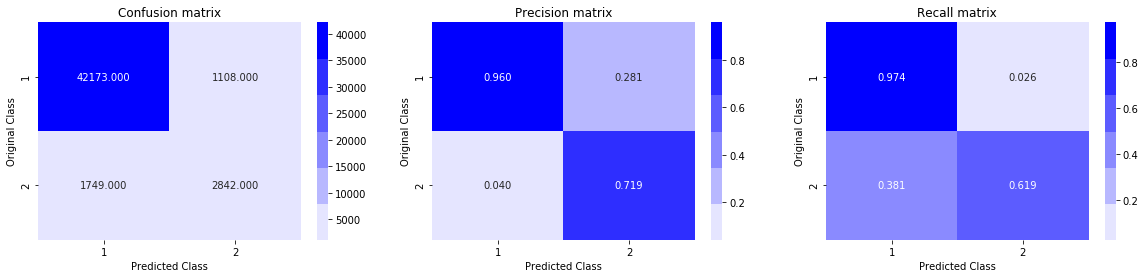

accuracy for severe_toxic is : 0.9861923462566845
Confusion matrix for severe_toxic:


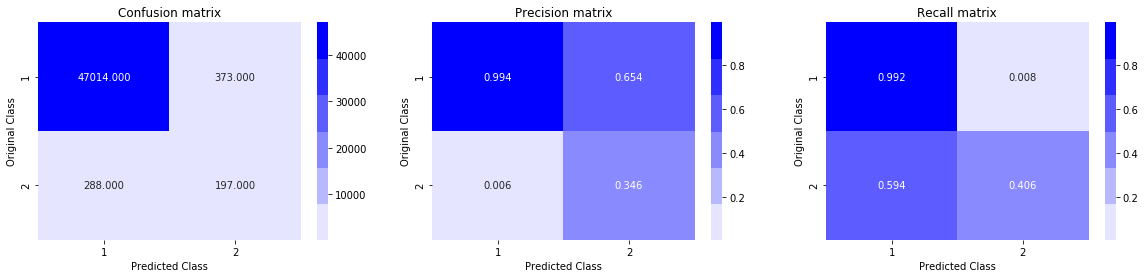

accuracy for obscene is : 0.9617103943850267
Confusion matrix for obscene:


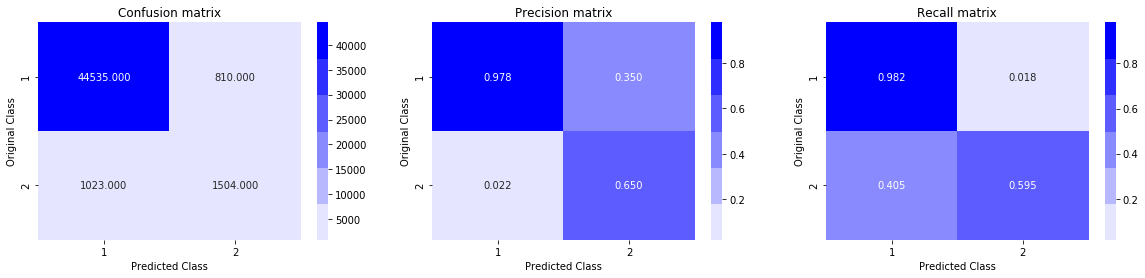

accuracy for threat is : 0.9956968582887701
Confusion matrix for threat:


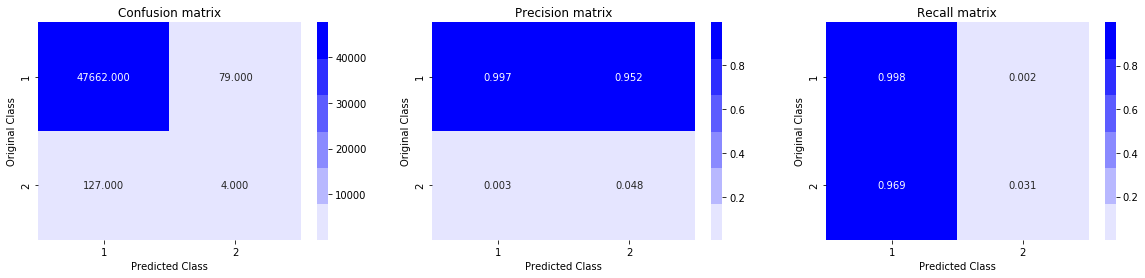

accuracy for insult is : 0.9600810494652406
Confusion matrix for insult:


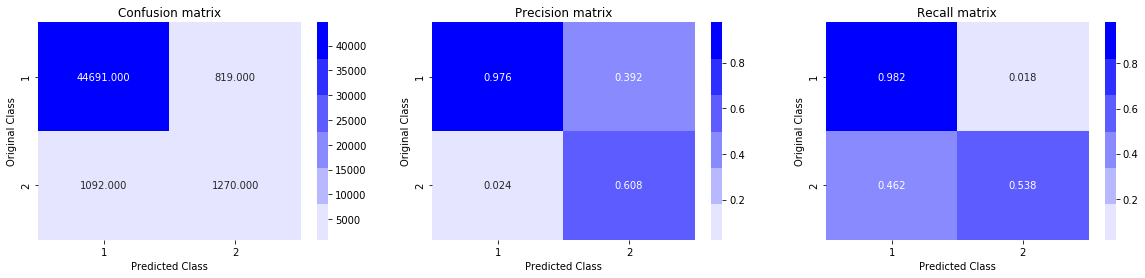

accuracy for identity_hate is : 0.9876963569518716
Confusion matrix for identity_hate:


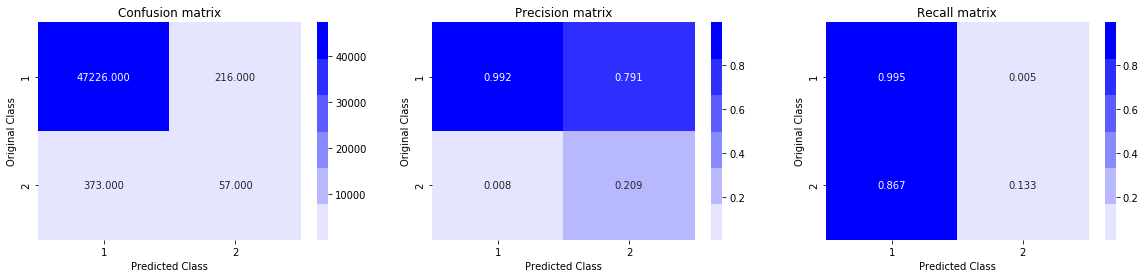

In [36]:
print('accuracy for toxic is :' ,accuracy_score(y1_test, y1_pred_nb))
print('Confusion matrix for toxic:')
plot_confusion_matrix(y1_test,y1_pred_nb)
print('accuracy for severe_toxic is :' ,accuracy_score(y2_test, y2_pred_nb))
print('Confusion matrix for severe_toxic:')
plot_confusion_matrix(y2_test,y2_pred_nb)
print('accuracy for obscene is :' ,accuracy_score(y3_test, y3_pred_nb))
print('Confusion matrix for obscene:')
plot_confusion_matrix(y3_test,y3_pred_nb)
print('accuracy for threat is :' ,accuracy_score(y4_test, y4_pred_nb))
print('Confusion matrix for threat:')
plot_confusion_matrix(y4_test,y4_pred_nb)
print('accuracy for insult is :' ,accuracy_score(y5_test, y5_pred_nb))
print('Confusion matrix for insult:')
plot_confusion_matrix(y5_test,y5_pred_nb)
print('accuracy for identity_hate is :' ,accuracy_score(y6_test, y6_pred_nb))
print('Confusion matrix for identity_hate:')
plot_confusion_matrix(y6_test,y6_pred_nb)

Logistic Regression

In [37]:
lr=LogisticRegression()

In [38]:
y1_pred_lr=lr.fit(X_train,y1_train).predict(X_test)
y2_pred_lr=lr.fit(X_train,y2_train).predict(X_test)
y3_pred_lr=lr.fit(X_train,y3_train).predict(X_test)
y4_pred_lr=lr.fit(X_train,y4_train).predict(X_test)
y5_pred_lr=lr.fit(X_train,y5_train).predict(X_test)
y6_pred_lr=lr.fit(X_train,y6_train).predict(X_test)

C:\Users\TOTO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TOTO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Accuracy & Confusion matrix

accuracy for toxic is : 0.9571774732620321
Confusion matrix for toxic:


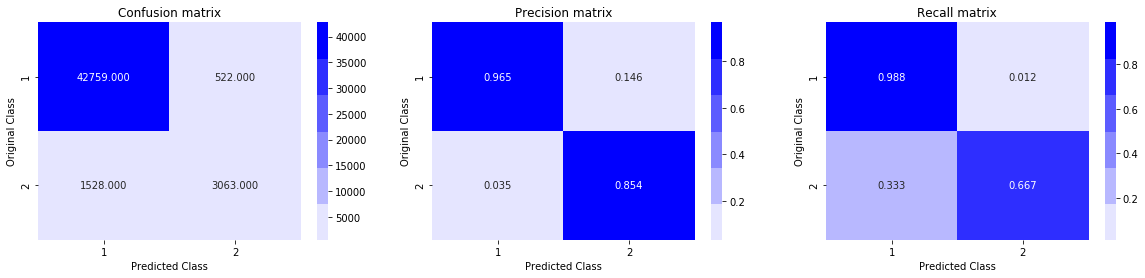

accuracy for severe_toxic is : 0.9896599264705882
Confusion matrix for severe_toxic:


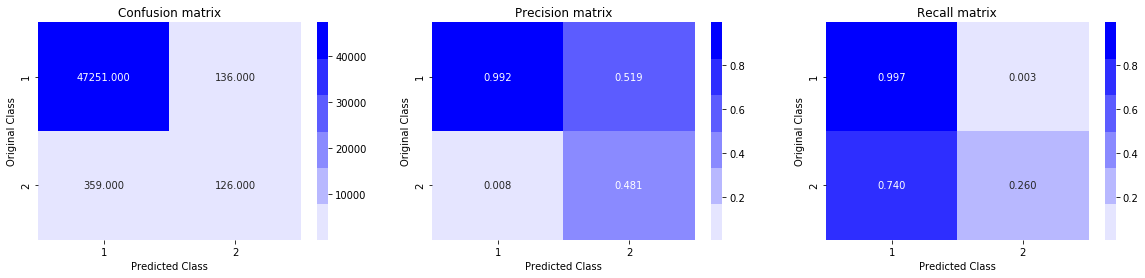

accuracy for obscene is : 0.9767922794117647
Confusion matrix for obscene:


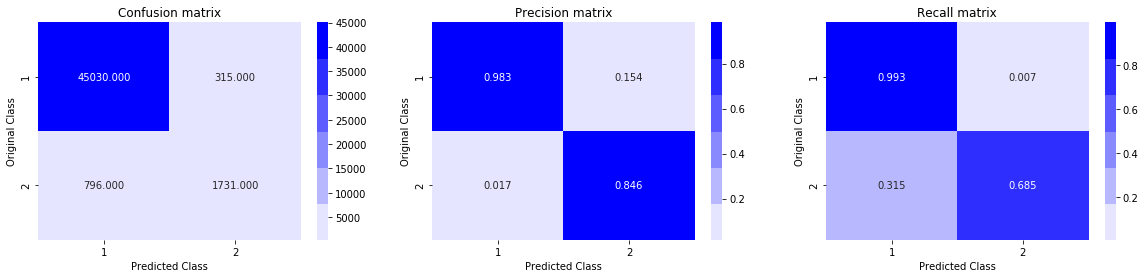

accuracy for threat is : 0.9968039772727273
Confusion matrix for threat:


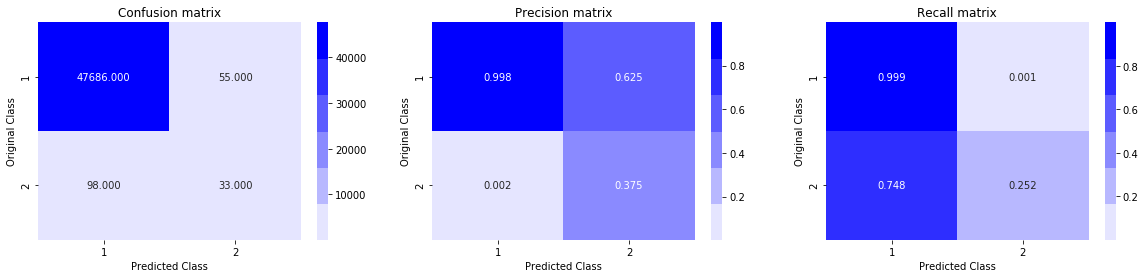

accuracy for insult is : 0.9667655414438503
Confusion matrix for insult:


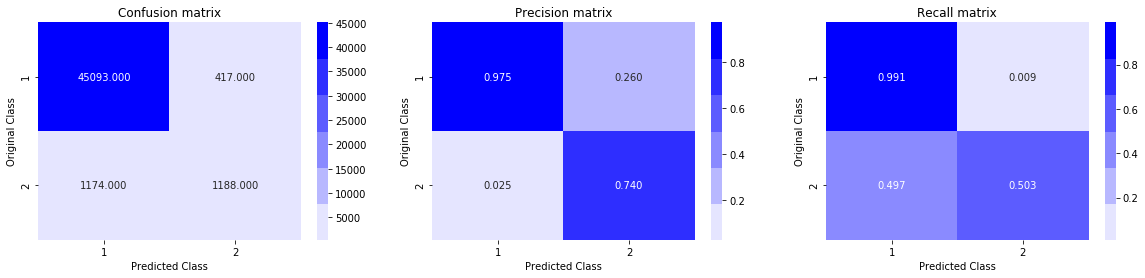

accuracy for identity_hate is : 0.9905163770053476
Confusion matrix for identity_hate:


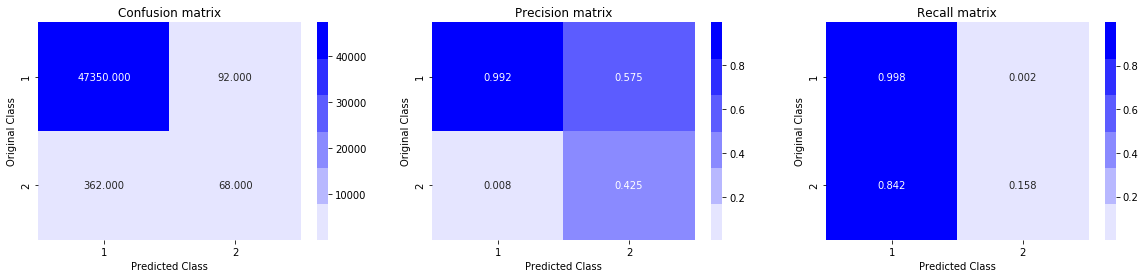

In [39]:
print('accuracy for toxic is :' ,accuracy_score(y1_test, y1_pred_lr))
print('Confusion matrix for toxic:')
plot_confusion_matrix(y1_test,y1_pred_lr)
print('accuracy for severe_toxic is :' ,accuracy_score(y2_test, y2_pred_lr))
print('Confusion matrix for severe_toxic:')
plot_confusion_matrix(y2_test,y2_pred_lr)
print('accuracy for obscene is :' ,accuracy_score(y3_test, y3_pred_lr))
print('Confusion matrix for obscene:')
plot_confusion_matrix(y3_test,y3_pred_lr)
print('accuracy for threat is :' ,accuracy_score(y4_test, y4_pred_lr))
print('Confusion matrix for threat:')
plot_confusion_matrix(y4_test,y4_pred_lr)
print('accuracy for insult is :' ,accuracy_score(y5_test, y5_pred_lr))
print('Confusion matrix for insult:')
plot_confusion_matrix(y5_test,y5_pred_lr)
print('accuracy for identity_hate is :' ,accuracy_score(y6_test, y6_pred_lr))
print('Confusion matrix for identity_hate:')
plot_confusion_matrix(y6_test,y6_pred_lr)

Decision Tree

In [40]:
dt = DecisionTreeClassifier()

In [41]:
y1_pred_dt=dt.fit(X_train,y1_train).predict(X_test)
y2_pred_dt=dt.fit(X_train,y2_train).predict(X_test)
y3_pred_dt=dt.fit(X_train,y3_train).predict(X_test)
y4_pred_dt=dt.fit(X_train,y4_train).predict(X_test)
y5_pred_dt=dt.fit(X_train,y5_train).predict(X_test)
y6_pred_dt=dt.fit(X_train,y6_train).predict(X_test)

Accuracy & Confusion matrix

accuracy for toxic is : 0.9393382352941176
Confusion matrix for toxic:


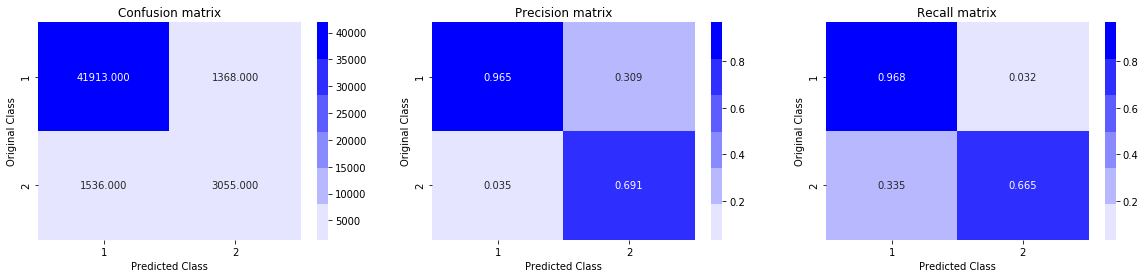

accuracy for severe_toxic is : 0.9876336898395722
Confusion matrix for severe_toxic:


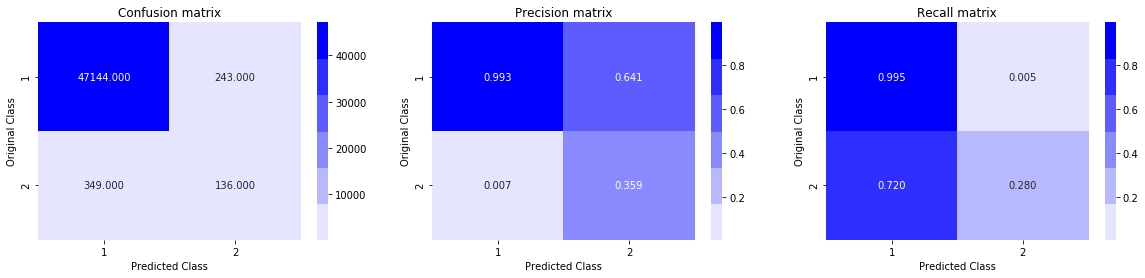

accuracy for obscene is : 0.9709851270053476
Confusion matrix for obscene:


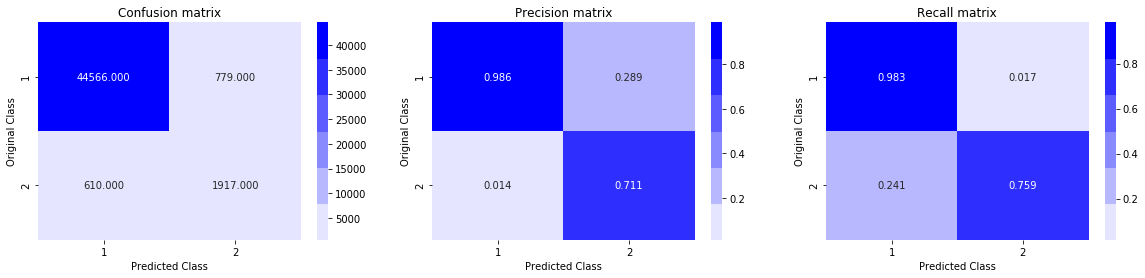

accuracy for threat is : 0.9963026403743316
Confusion matrix for threat:


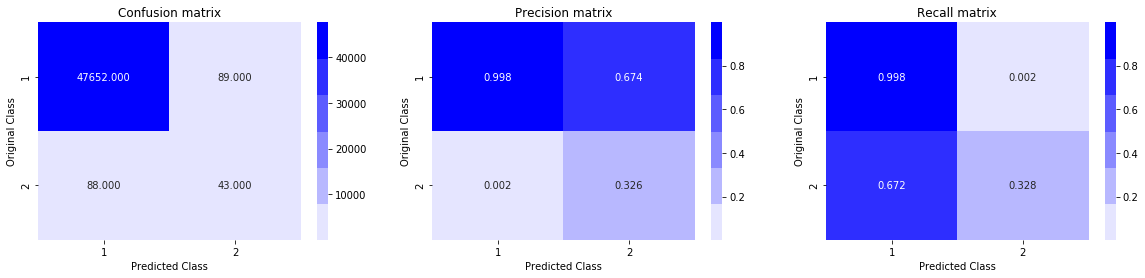

accuracy for insult is : 0.9621699532085561
Confusion matrix for insult:


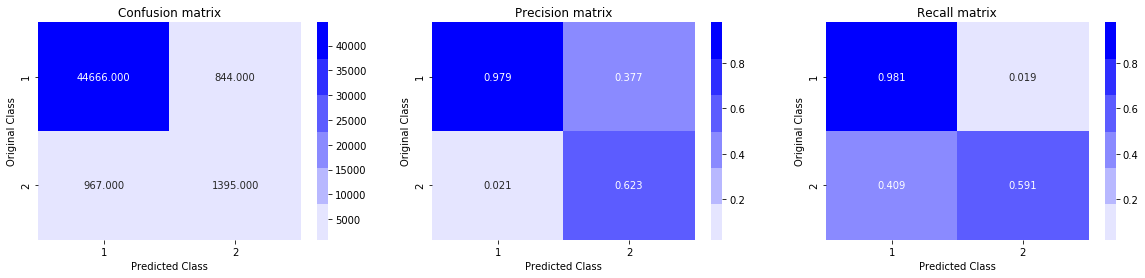

accuracy for identity_hate is : 0.9897225935828877
Confusion matrix for identity_hate:


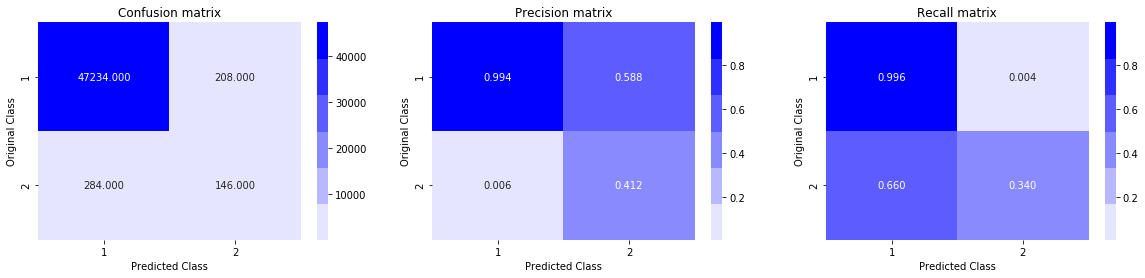

In [42]:
print('accuracy for toxic is :' ,accuracy_score(y1_test, y1_pred_dt))
print('Confusion matrix for toxic:')
plot_confusion_matrix(y1_test,y1_pred_dt)
print('accuracy for severe_toxic is :' ,accuracy_score(y2_test, y2_pred_dt))
print('Confusion matrix for severe_toxic:')
plot_confusion_matrix(y2_test,y2_pred_dt)
print('accuracy for obscene is :' ,accuracy_score(y3_test, y3_pred_dt))
print('Confusion matrix for obscene:')
plot_confusion_matrix(y3_test,y3_pred_dt)
print('accuracy for threat is :' ,accuracy_score(y4_test, y4_pred_dt))
print('Confusion matrix for threat:')
plot_confusion_matrix(y4_test,y4_pred_dt)
print('accuracy for insult is :' ,accuracy_score(y5_test, y5_pred_dt))
print('Confusion matrix for insult:')
plot_confusion_matrix(y5_test,y5_pred_dt)
print('accuracy for identity_hate is :' ,accuracy_score(y6_test, y6_pred_dt))
print('Confusion matrix for identity_hate:')
plot_confusion_matrix(y6_test,y6_pred_dt)